In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   -----------

   ------------------- ------------------- 63.5/124.9 MB 425.4 kB/s eta 0:02:25
   ------------------- ------------------- 63.6/124.9 MB 425.7 kB/s eta 0:02:25
   ------------------- ------------------- 63.6/124.9 MB 426.0 kB/s eta 0:02:24
   ------------------- ------------------- 63.6/124.9 MB 426.8 kB/s eta 0:02:24
   ------------------- ------------------- 63.7/124.9 MB 427.9 kB/s eta 0:02:24
   ------------------- ------------------- 63.7/124.9 MB 427.4 kB/s eta 0:02:24
   ------------------- ------------------- 63.7/124.9 MB 428.2 kB/s eta 0:02:23
   ------------------- ------------------- 63.7/124.9 MB 427.9 kB/s eta 0:02:23
   ------------------- ------------------- 63.8/124.9 MB 427.4 kB/s eta 0:02:24
   ------------------- ------------------- 63.8/124.9 MB 428.2 kB/s eta 0:02:23
   ------------------- ------------------- 63.8/124.9 MB 427.9 kB/s eta 0:02:23
   ------------------- ------------------- 63.9/124.9 MB 428.8 kB/s eta 0:02:23
   ------------------- -----------------

In [13]:
import pandas as pd

# Replace 'D:/Thesis/New folder/dataset.csv' with your actual file path
file_path = 'D:/Thesis/New folder/dataset.csv'

# Read the dataset into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify it has been imported correctly
data.head()

,Message ID,Subject,text,label
0,0,christmas tree farm pictures,NaN,ham
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham


In [15]:
# Read the data from the CSV file and store it in the data variable
data = pd.read_csv(file_path, encoding='latin-1')

# Print the data
print(data)

      Message ID                                            Subject  \
0              0                       christmas tree farm pictures   
1              1                           vastar resources , inc .   
2              2                       calpine daily gas nomination   
3              3                                         re : issue   
4              4                          meter 7268 nov allocation   
...          ...                                                ...   
33388      33711  = ? iso - 8859 - 1 ? q ? good _ news _ c = eda...   
33389      33712  all prescript medicines are on special . to be...   
33390      33713              the next generation online pharmacy .   
33391      33714                     bloow in 5 - 10 times the time   
33392      33715                   dear sir , i am interested in it   

                                                    text label  
0                                                    NaN   ham  
1      gary , pro

In [16]:
# Preprocessing the dataset
data = data[['label', 'text']].dropna()
data.columns = ['label', 'text']
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [17]:
print(data['label'].value_counts())

label
1    16852
0    16176
Name: count, dtype: int64


In [18]:
# Split the data into features and target
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [19]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

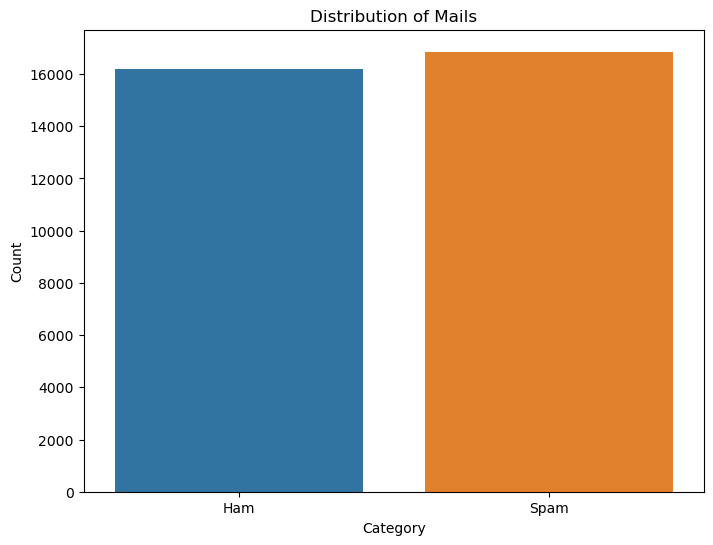

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of spam vs ham using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Mails')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

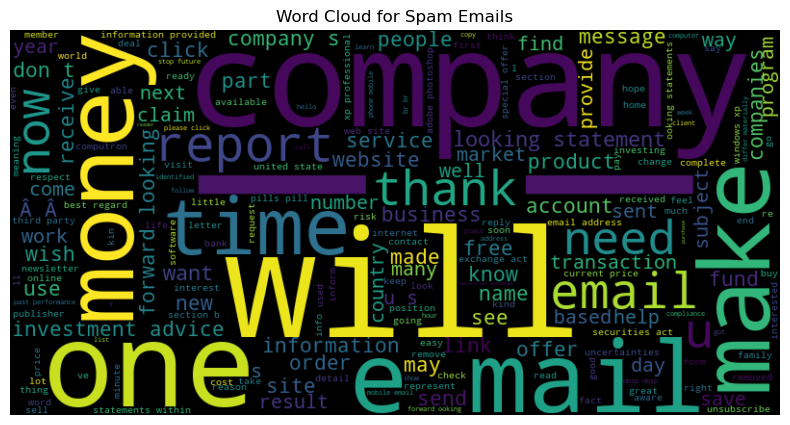

In [23]:
!pip install wordcloud
from wordcloud import WordCloud

# Generate a word cloud for spam emails
spam_words = ' '.join(list(data[data['label'] == 1]['text']))
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')
plt.show()

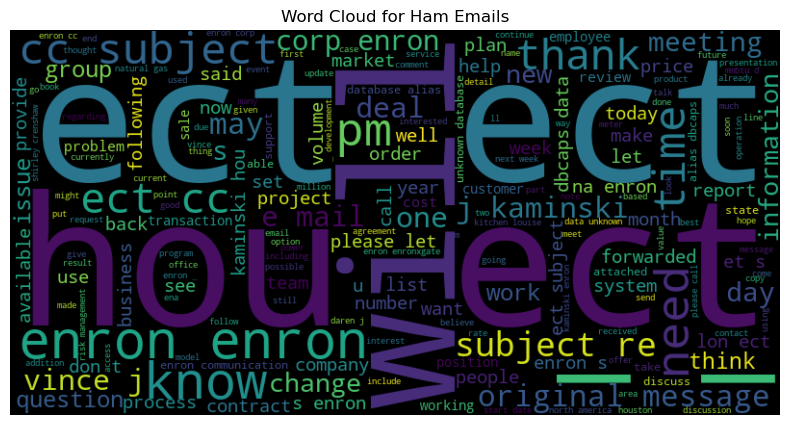

In [24]:
# Generate a word cloud for ham emails
ham_words = ' '.join(list(data[data['label'] == 0]['text']))
ham_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Emails')
plt.axis('off')
plt.show()

In [25]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'ham': 0, 'spam': 1}


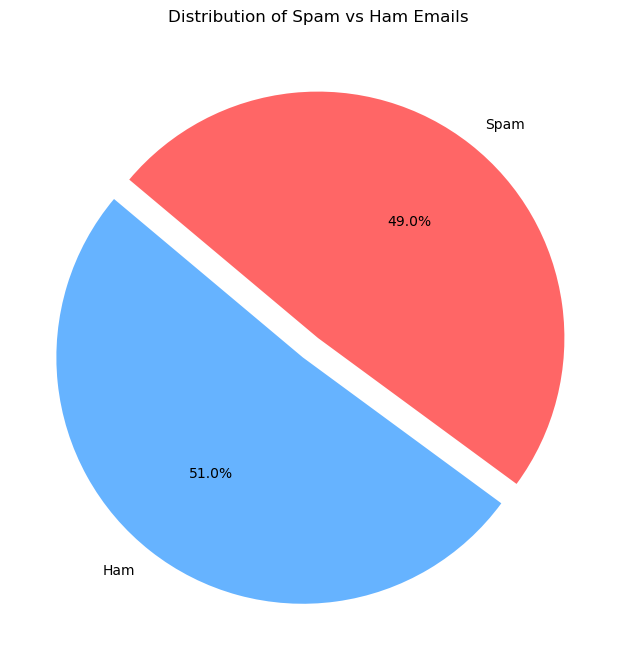

In [26]:
# Plotting the distribution of spam vs ham as a pie chart
labels = ['Ham', 'Spam']
sizes = data['label'].value_counts()
colors = ['#66b3ff','#ff6666']
explode = (0.1, 0)  # explode the 1st slice (Ham)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Spam vs Ham Emails')
plt.show()

In [27]:
# Define the classifiers
svc = SVC(probability=True)
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
nb = MultinomialNB()

In [28]:
# Define parameter grids for grid search
param_grids = {
    'svc': {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf']
    },
    'rf': {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20]
    },
    'xgb': {
        'clf__n_estimators': [50, 100, 200],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__max_depth': [3, 6, 9]
    },
    'nb': {
        'clf__alpha': [0.1, 1, 10]
    }
}

In [29]:
# Define pipelines for each classifier
pipelines = {
    'svc': Pipeline([('clf', svc)]),
    'rf': Pipeline([('clf', rf)]),
    'xgb': Pipeline([('clf', xgb)]),
    'nb': Pipeline([('clf', nb)])
}

In [30]:
# Perform grid search for each classifier
grid_searches = {}
for clf_name in pipelines:
    grid_search = GridSearchCV(pipelines[clf_name], param_grids[clf_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_tfidf, y_train)
    grid_searches[clf_name] = grid_search


C:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:14:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [31]:
# Retrieving the best parameters for each classifier
best_params = {clf_name: grid_searches[clf_name].best_params_ for clf_name in grid_searches}
best_params

{'svc': {'clf__C': 10, 'clf__kernel': 'rbf'},
 'rf': {'clf__max_depth': None, 'clf__n_estimators': 100},
 'xgb': {'clf__learning_rate': 0.2,
  'clf__max_depth': 9,
  'clf__n_estimators': 200},
 'nb': {'clf__alpha': 0.1}}

In [32]:
import pandas as pd

# Convert the best parameters to a DataFrame
best_params_df = pd.DataFrame(best_params).T
best_params_df

,clf__C,clf__kernel,clf__max_depth,clf__n_estimators,clf__learning_rate,clf__alpha
svc,10,rbf,NaN,NaN,NaN,NaN
rf,NaN,NaN,NaN,100.0,NaN,NaN
xgb,NaN,NaN,9.0,200.0,0.2,NaN
nb,NaN,NaN,NaN,NaN,NaN,0.1


In [33]:
# Extract the best estimators
best_estimators = {clf_name: grid_searches[clf_name].best_estimator_ for clf_name in grid_searches}

In [34]:
for clf_name in best_params:
    print(f'Best parameters for {clf_name}: {best_params[clf_name]}')

Best parameters for svc: {'clf__C': 10, 'clf__kernel': 'rbf'}
Best parameters for rf: {'clf__max_depth': None, 'clf__n_estimators': 100}
Best parameters for xgb: {'clf__learning_rate': 0.2, 'clf__max_depth': 9, 'clf__n_estimators': 200}
Best parameters for nb: {'clf__alpha': 0.1}


In [35]:
# Create the majority vote classifier
voting_clf = VotingClassifier(estimators=[
    ('svc', best_estimators['svc']),
    ('rf', best_estimators['rf']),
    ('xgb', best_estimators['xgb']),
    ('nb', best_estimators['nb'])
], voting='soft')

In [36]:
# Fit the majority vote classifier
voting_clf.fit(X_train_tfidf, y_train)

C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:45:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('svc',
                              Pipeline(steps=[('clf',
                                               SVC(C=10, probability=True))])),
                             ('rf',
                              Pipeline(steps=[('clf',
                                               RandomForestClassifier())])),
                             ('xgb',
                              Pipeline(steps=[('clf',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_c...
                                                             learning_rate=0.2,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=9,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))])),
                             ('nb',
                              Pipeline(steps=[('clf',
                                               MultinomialNB(alpha=0.1))]))],
                 voting='soft')

In [37]:
# Evaluate the individual models
individual_accuracies = {}
for clf_name in best_estimators:
    accuracy = best_estimators[clf_name].score(X_test_tfidf, y_test)
    individual_accuracies[clf_name] = accuracy
    print(f'Accuracy for {clf_name}: {accuracy:.4f}')


Accuracy for svc: 0.9900
Accuracy for rf: 0.9861
Accuracy for xgb: 0.9811
Accuracy for nb: 0.9865


In [38]:
# Evaluate the model
accuracy = voting_clf.score(X_test_tfidf, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9912201029367242


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Detailed classification report
y_pred = voting_clf.predict(X_test_tfidf)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3235
           1       0.99      1.00      0.99      3371

    accuracy                           0.99      6606
   macro avg       0.99      0.99      0.99      6606
weighted avg       0.99      0.99      0.99      6606



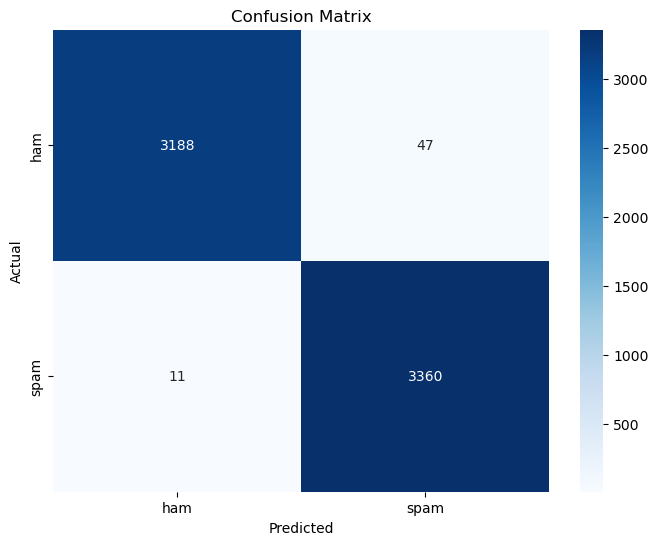

In [41]:

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

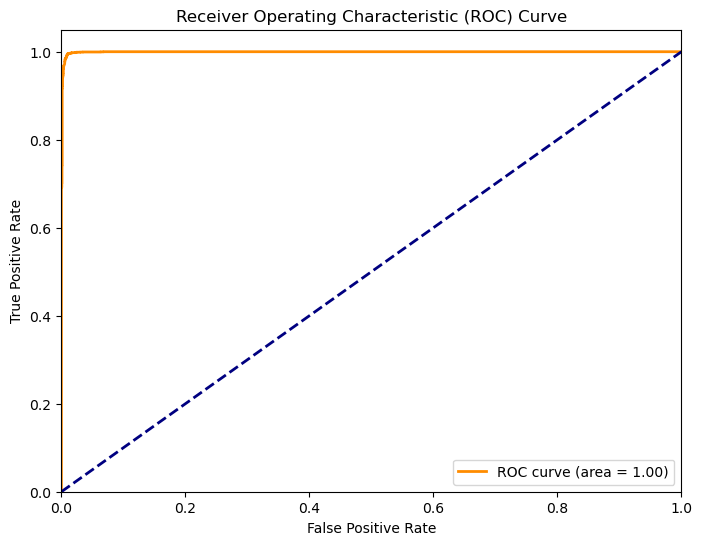

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for the majority vote classifier
y_pred_proba = voting_clf.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy for svc: 0.9900
Accuracy for rf: 0.9861
Accuracy for xgb: 0.9811
Accuracy for nb: 0.9865
Accuracy of voting classifier: 0.9912
  Classifier  Accuracy  Precision    Recall  F1 Score
0        svc  0.990009   0.983895  0.996737  0.990274
1         rf  0.986073   0.980088  0.992880  0.986443
2        xgb  0.981078   0.968533  0.995254  0.981712
3         nb  0.986527   0.983216  0.990507  0.986848
4     voting  0.991220   0.986205  0.996737  0.991443


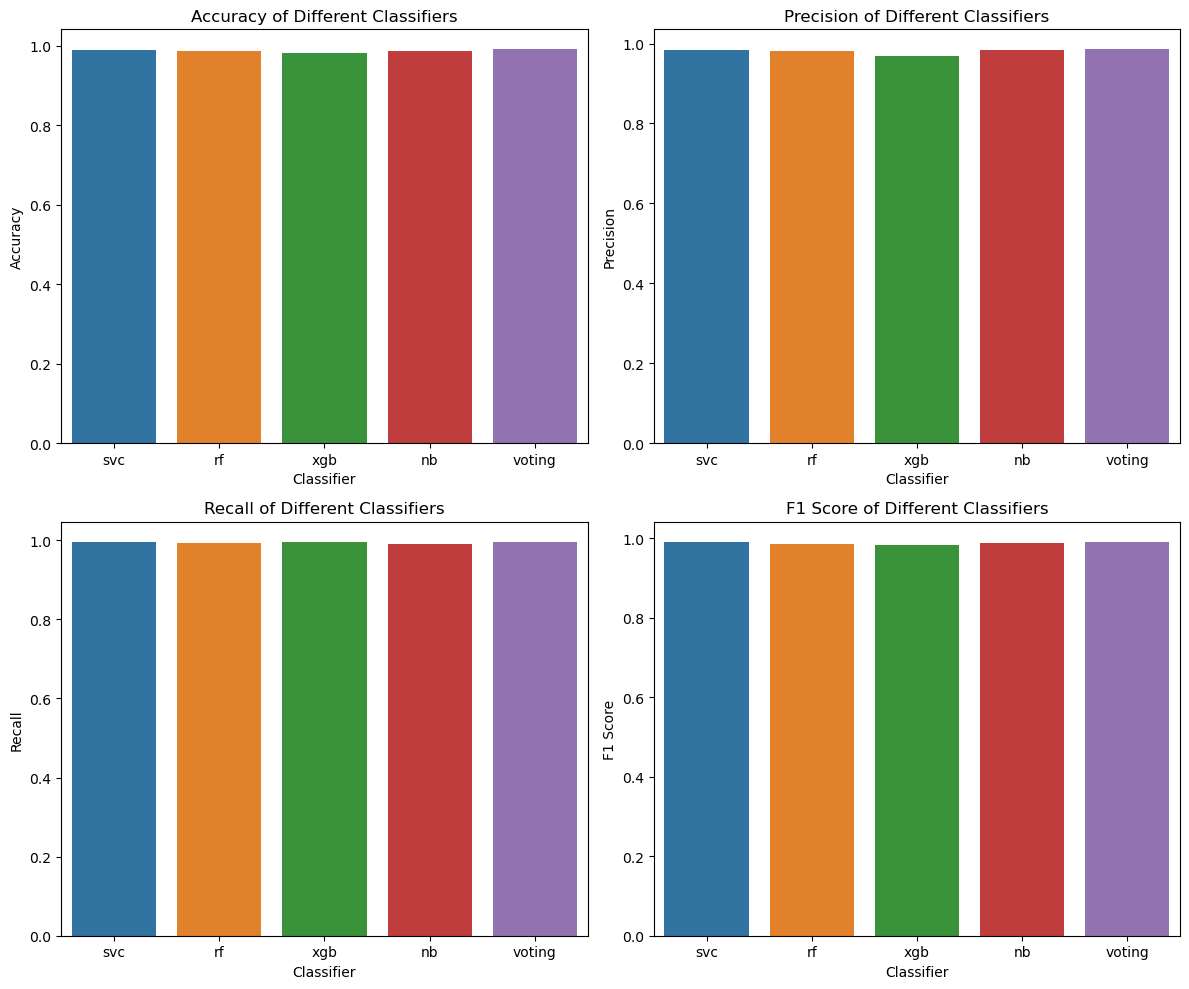

In [43]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
# Evaluate the individual models
metrics = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for clf_name in best_estimators:
    y_pred = best_estimators[clf_name].predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics['Classifier'].append(clf_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)
    print(f'Accuracy for {clf_name}: {accuracy:.4f}')

# Evaluate the majority vote classifier
y_pred_voting = voting_clf.predict(X_test_tfidf)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_precision = precision_score(y_test, y_pred_voting)
voting_recall = recall_score(y_test, y_pred_voting)
voting_f1 = f1_score(y_test, y_pred_voting)

metrics['Classifier'].append('voting')
metrics['Accuracy'].append(voting_accuracy)
metrics['Precision'].append(voting_precision)
metrics['Recall'].append(voting_recall)
metrics['F1 Score'].append(voting_f1)

print(f'Accuracy of voting classifier: {voting_accuracy:.4f}')

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display metrics in a box (table)
print(metrics_df)

# Plotting metrics
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(x='Classifier', y='Accuracy', data=metrics_df, ax=axs[0, 0])
axs[0, 0].set_title('Accuracy of Different Classifiers')

sns.barplot(x='Classifier', y='Precision', data=metrics_df, ax=axs[0, 1])
axs[0, 1].set_title('Precision of Different Classifiers')

sns.barplot(x='Classifier', y='Recall', data=metrics_df, ax=axs[1, 0])
axs[1, 0].set_title('Recall of Different Classifiers')

sns.barplot(x='Classifier', y='F1 Score', data=metrics_df, ax=axs[1, 1])
axs[1, 1].set_title('F1 Score of Different Classifiers')

plt.tight_layout()
plt.show()

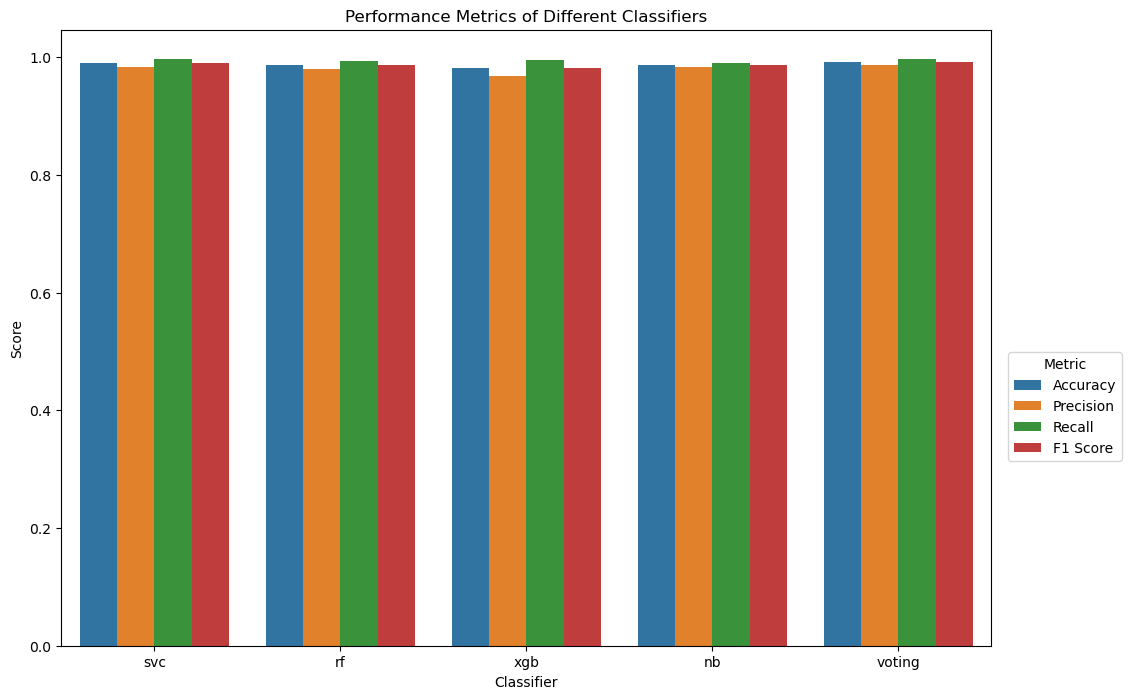

In [44]:
# Plotting metrics in one graph
metrics_melted = metrics_df.melt(id_vars='Classifier', var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 8))
sns.barplot(x='Classifier', y='Value', hue='Metric', data=metrics_melted)
plt.title('Performance Metrics of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.legend(loc='lower right', bbox_to_anchor=(1.14, 0.3), borderaxespad=0., title='Metric') # Adjust bbox_to_anchor as needed
plt.show()

In [45]:
# Perform predictions on sample data
sample_texts = ["Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now.",
                "Hey, I was wondering if we could reschedule our meeting to next week?"]
sample_texts_tfidf = vectorizer.transform(sample_texts)
predictions = voting_clf.predict(sample_texts_tfidf)
predicted_labels = label_encoder.inverse_transform(predictions)
for text, label in zip(sample_texts, predicted_labels):
    print(f'Text: {text}\nPredicted Label: {label}\n')

Text: Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now.
Predicted Label: spam

Text: Hey, I was wondering if we could reschedule our meeting to next week?
Predicted Label: ham



In [46]:
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 26422
Number of testing samples: 6606
